# Lensing a flat map

In [1]:
using CMBLensing, PyPlot

First we load a simulated unlensed field, $f$, and lensing potential, $\phi$,

In [2]:
@unpack f,ϕ = load_sim_dataset(
    θpix  = 2,       # size of the pixels in arcmin
    Nside = 256,     # number of pixels per side in the map
    T     = Float32, # Float32 or Float64 (former is ~twice as fast)
    pol   = :I       # :I for Intensity, :P for polarization, or :IP for both
);

We can lense the map with LenseFlow,

In [3]:
f̃ = LenseFlow(ϕ) * f;

And flip between lensed and unlensed maps,

In [4]:
animate([f,f̃], fps=1)

HTML{String}("<video width=\"560\" height=\"400\" controls autoplay loop>\n  <source type=\"video/mp4\" src=\"data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAADKwG1kYXQAAAKgBgX//5zcRem9\n5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENv\ncHlsZWZ0IDIwMDMtMjAxNyAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9w\ndGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1o\nZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2\nIGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0\nX3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTEyIGxvb2thaGVhZF90aHJlYWRz\nPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9j\nb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0\nPTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWlu\ndD0yNTAga2V5aW50X21pbj0xIHNjZW5lY3V0PTQwIGludHJhX3JlZnJlc2g9MCByY19sb29rYWhl\nYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAgcXBtaW49MCBxcG1heD02\nOSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAACsR2WIhAAW//730z/Msuv3ObXj\nqPeiniZfQ3UlAZuWxQtX/gt33wAFfs5Jw/5yxI2oYEuxFfHi710IAAADAI7nAXcj9saUVg1AzX+r\nHK+amfa8AA60YbzMGytXOyvNrU60dggOmoXq9IRNFcUBvdB5oGxslyJkj6pv+DsACV3rriTXhCuh\nwQvXB1M8dLekVJzeg7AAxhcdgNnzdaXJW+bxCeXS6L4+Nc4slt4+9wYU+DC6Bv/g5D4+6v0hLvX/\nqf2dxZaersRlCQFREi7T4nlODpb407OezjYY6v3irg8eCK9ORi3GOGsdC2WbJk9rTMwvk+mSh/s/\nW+wXpZZ1qOQj95OxjJlk850mZc5mTTCtG6HPmn5vh9pr7+Y2usfgNBHnZ8IXVcT+c/uniKzk2mvF\ndGeKLC7x9zfKkTSj82alJI7n5N342R8hPiWl8gOXwgD95OTDRwQEQH2X+jcrLeFzDDpH/dKUTLRp\nF7ISlTINPMdi5w4r56eiB9u63SSoVADHgG+m11hLz8Lpq6gkoUOMHtjB/8U1kN6rcmc9Cpc104tx\ncjOxa5q91da65hD93Y7R6nkjNDPmUZAq1t7mHCI/yAz3vnF1AWHXRpSTuSZz6luba2cgXyXDuf1x\ncRNwix4K9Do0JWvUUo3J6JQbykna80/jy7mjkj8YbFxhWb2lVsKYmzjQiGSlaIs+ZyfN2Ts8HV6Q\nUP0NssBRj6r2ruzaClwyX8jDFM5myVxtLEWt4YB/K5c1UXPMBsgLdTpCW8wDqIEaY88wwFHF+vtY\nWXaqFI6/TKFzsf04OvFKu29NdnYy57j2N5sfgX610MTZ3K4baLkcT/rs2qZU+n0dl1Zu97eei//h\n9GGzdJO0njwVQjYGGNCXMWtzvnEnt5pocaTj2Lg/yO7QvQ8J/EJ0nxPn+otJu9a65JMCPEq2KE7c\nGmZBz9sI0SlIldZgSYFBFHlikSyIMUnKQPHsDPZukfiACqpPaoGBaVqohO2v9dYTQtqEHR50YFOo\nReN+JQnuOUk+RI50MvU+UcMatX4KErX4/VgIkd13mZcffq+oVCAA3+Vf2EF0KIxB8JhQjgiyHpDE\nqaJIi0Y9Gmf3DtTgJGrvxo1HXdBox7GtDmLhkT+lDSga3VGmHlUYSZ7yTQTwMz/NYy7tUJnHlJYU\nNrhDXOjW9+APiDtqxZkOWCiiVh5mafO9jLbXf2dOUSdLTIitG62rLAl14IcmKSByGPCbku6tCIc/\nuWuhvowpBakK//q+N/sas74gVmzyKnLAAAI3p8MCrxNMUvFwqFnSeaSjajCU+Ho5XO39I9BuxsQr\nREOJj5d5M6Ik9w06qvZcGiAftXom0mSOnCVdtxlyz46Rb9S6bG02JRlxT9eSaZ5OlKWl8MgmaBej\n12Rnkwcip+vu/RT8YIhFJdWg4CQY3pUp8x5tqSsGNjbSdxoiuPamO6PH8wJnrztnu3G2o3iUgF/i\n/SNzwkRbazGE+s+M6x8t2UlvqfaYslNohh/+r9glQEcu9QZNpAESCOCRg8ZhiZnnPHPMsLs0gWvT\nnzmTpLXXibfVXZmURJ7ShXJ5PWj8wzd3+PXPmaFYwikEI+HFds39vlHKnMX7OV0dgifiKoOWHth1\nVVqtaWwFf/VL4Wa1LPd56ildG2oPYvIKokBjBTwnaTQbc3/pGBLku2EjhRFWYEE8HPqK/LOuqpUI\nnJC7iLaLcjWBrlU1PQ6JfKyiLNgdVs8JyQwvB/3/OCwg2HHbJM25kG5SUPBnBKu0HfE8i5WogQJU\nfweY805Bc4HTlC5zKU+OX7fmJ1vEclN887UAuLZKeO8+fboqOLf98Nu5iYm6P6wWAWRDK5vog4MK\nqIzRAzrvBLJNaJ1LXO+TOwJmeMRxjutx7jBLp9+U7FEA9HOwKSX3EHW7xbQNryp4PNsomzx/jqrA\nCUKHPGxgYaqFxdKI7OZb5rxK/KyLl29BnwQCKxaoNgwdEPQsg6u0G/kS0wr1zyEpUrtOYcR17eK2\nBGUU1QIVUl06wz3JiEzumahvxCBK3NTbMUXrATCXfVAgbALhFdT0sdrx/Q8gt/gnOBN0VWQRmE+o\nYsU4VjL+0ToyjfZFNfVQnzb5iF8rOFYQ8su641672flE8tfILWpegIT3y6gyfyYFwg9CXlWWyfRD\n/aWsGaYwyd0WlMWV4Z2E4cfu64mu8SlUomvECVAAuC/Fr0yrbZ19DPLmdNdv1RL31Gfrnc9QTGiI\nV9p8bf57yGpiFV7dkESbURZcFd9NGenADYscBytwos25dJBn4pQAkN0Pv2qv4ilm3xLkIukQ01yJ\nQK9LJbKdLIyGQMgyZNu4hlb+1nynyrjnya4A/PR61/kBZoj5dPwAI8i+PsMxZHaiRg6Af2EYmIQn\nK74i/5e0RbMuqSD2pKbx918OjkCd4cx7JD6MOXkxD0UnrZ9RaR9VZ/jKX+Dk7VBLDjqy4Rvka02o\nGzPuQTl7wyDDIb1TlWmTh/OTboOCyvptqfvmKhdpz4jOl7PE8GA8Cb2+zLgOUerRj+7YLoH3/Zxx\n55WR8WZ47CZfBQRkWUWE1e+6RLkDf3j0a3GitUVNcRFu/9hJFrZ6vzbB8m4bcN0qGlZSf6p04hFn\nApcmU2NRTPCgq3eSTu0f+43kUH9lrV3RzCsp//byI/E5S6wCBzhmi4Zz1puRZmctY/ak2aMCMdKd\nsh0WbFByXRnRha8WXvZavt/9gaxEcK/8wvTmyJKqd8GjPsiTkf/UTJijgbPWrmh/+fDqWiANr/mC\nv6+7iDJWVqJNqxd0Ok6JcHMz01Z4RBFNfv2oZmwwpGAY/q

The difference between lensed and unlensed,

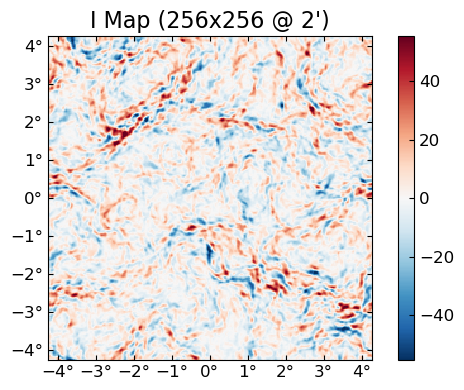

In [5]:
plot(f-f̃);

## Loading your own data

CMBLensing flat-sky `Field` objects like `f` or `ϕ`  are just thin wrappers around arrays. You can get the underlying data arrays for $I(\mathbf{x})$, $Q(\mathbf{x})$, and $U(\mathbf{x})$ with `f[:Ix]`, `f[:Qx]`, and `f[:Ux]` respectively, or the Fourier coefficients, $I(\mathbf{l})$, $Q(\mathbf{l})$, and $U(\mathbf{l})$ with `f[:Il]`, `f[:Ql]`, and `f[:Ul]`,

In [6]:
mapdata = f[:Ix]

256×256 Array{Float32,2}:
 -16.1641    -4.82767   19.0742   …  -22.3028   -22.3116  -20.3282 
 -19.2662     7.75875   36.3605      -43.1025   -42.3541  -36.5662 
  -4.51953   26.9088    53.7757      -42.2794   -39.1082  -29.2735 
  24.662     48.878     72.4737      -19.2994   -12.2083    1.66441
  54.5696    67.6859    89.7864        8.84155   22.467    39.7839 
  74.9038    76.4654    93.9621   …   38.8506    59.3929   74.8689 
  89.6832    85.9038    96.9422       69.812     88.5039   98.2822 
 102.807    103.316    112.823        94.8787   102.198   107.012  
 119.757    127.142    136.636       119.207    116.183   116.616  
 140.147    149.668    156.806       145.709    139.295   136.115  
 164.252    170.032    171.019    …  169.279    161.132   159.056  
 192.174    192.818    184.208       191.264    182.45    184.718  
 210.219    208.556    199.079       215.831    206.814   207.14   
   ⋮                              ⋱                         ⋮      
 -42.6      -43.515   

If you have your own map data in an array you'd like to load into a CMBLensing `Field` object, you can construct it as follows:

In [7]:
FlatMap(mapdata, θpix=3)

65536-element FlatMap{256×256 map, 3′ pixels, fourier∂, Array{Float32}}:
 -16.16407  
 -19.266151 
  -4.5195255
  24.662006 
  54.569637 
  74.90381  
  89.68318  
 102.80669  
 119.75659  
 140.14655  
 164.25192  
 192.17426  
 210.21875  
   ⋮        
 -38.97059  
 -35.542446 
 -29.546253 
 -29.236732 
 -36.018185 
 -42.79631  
 -36.845036 
 -18.57722  
   5.113369 
  26.057999 
  27.50513  
   6.132122 

For more info on `Field` objects, see [Field Basics](../05_field_basics/).

## Inverse lensing

You can inverse lense a map with the `\` operator (which does `A \ b ≡ inv(A) * b`):

In [8]:
LenseFlow(ϕ) \ f;

Note that this is true inverse lensing, rather than lensing by the negative deflection (which is often called "anti-lensing"). This means that lensing then inverse lensing a map should get us back the original map. Lets check that this is the case:

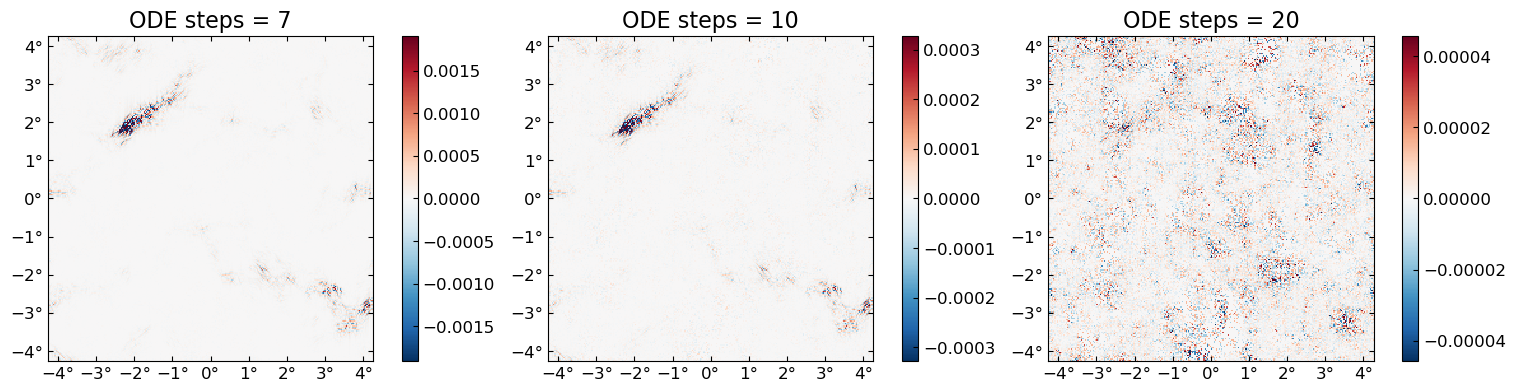

In [9]:
Ns = [7 10 20]
plot([f - (LenseFlow(ϕ,N) \ (LenseFlow(ϕ,N) * f)) for N in Ns],
    title=["ODE steps = $N" for N in Ns]);

A cool feature of LenseFlow is that inverse lensing is trivially done by running the LenseFlow ODE in reverse. Note that as we crank up the number of ODE steps above, we recover the original map to higher and higher precision.

## Other lensing algorithms

We can also lense via:
* `PowerLens`: the standard Taylor series expansion to any order:
$$ f(x+\nabla x) \approx f(x) + (\nabla f)(\nabla \phi) + \frac{1}{2} (\nabla \nabla f) (\nabla \phi)^2 + ... $$

* `TayLens` ([Næss&Louis 2013](https://arxiv.org/abs/1307.0719)): like `PowerLens`, but first a nearest-pixel permute step, then a Taylor expansion around the now-smaller residual displacement

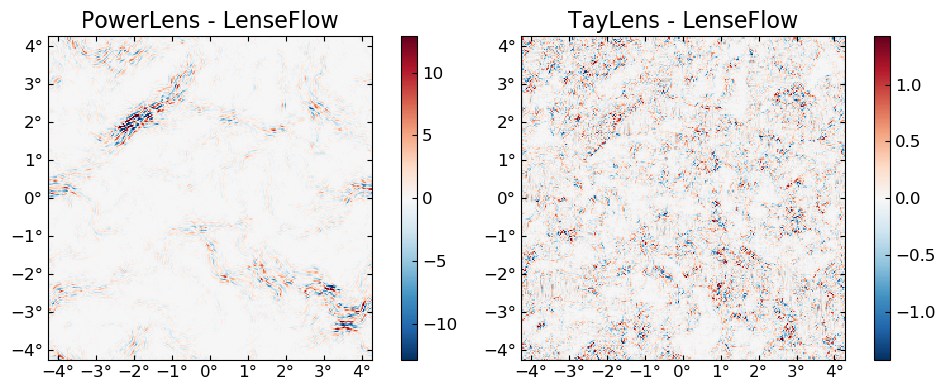

In [10]:
plot([(PowerLens(ϕ,2)*f - f̃) (Taylens(ϕ,2)*f - f̃)], 
    title=["PowerLens - LenseFlow" "TayLens - LenseFlow"]);

## Benchmarking

LenseFlow is highly optimized code since it appears on the inner-most loop of our analysis algorithms. To benchmark LenseFlow, note that there is first a precomputation step, which caches some data in preparation for applying it to a field of a given type. This was done automatically when evaluating `LenseFlow(ϕ) * f` but we can benchmark it separately since in many cases this only needs to be done once for a given $\phi$, e.g. when Wiener filtering at fixed $\phi$,

In [11]:
using BenchmarkTools

In [12]:
@benchmark cache(LenseFlow(ϕ),f)

BenchmarkTools.Trial: 
  memory estimate:  61.10 MiB
  allocs estimate:  2240
  --------------
  minimum time:     17.403 ms (0.00% GC)
  median time:      23.481 ms (19.69% GC)
  mean time:        27.646 ms (12.57% GC)
  maximum time:     118.942 ms (4.20% GC)
  --------------
  samples:          181
  evals/sample:     1

Once cached, it's very fast and memory non-intensive to repeatedly apply the operator:

In [13]:
@benchmark Lϕ * f setup=(Lϕ=cache(LenseFlow(ϕ),f))

BenchmarkTools.Trial: 
  memory estimate:  2.02 MiB
  allocs estimate:  335
  --------------
  minimum time:     14.264 ms (0.00% GC)
  median time:      16.341 ms (0.00% GC)
  mean time:        16.418 ms (0.24% GC)
  maximum time:     22.207 ms (0.00% GC)
  --------------
  samples:          123
  evals/sample:     1